<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px">   1.0  Clustering 
    </h1></div>

<div style=style="font-size: 18px">
   



<p style="font-family:times new roman">Before I formally introduce the topic of clustering, let me begin with a business use case—Let’s say, a leading bank corporation has an aim to increase their revenue from their credit card customers to scale up their business. In order to do so, their data science team can analyze the customer data and look for insights that can be used to upsell and cross-sell various products to their existing customers through targeted marketing campaigns.</p> 

<p style="font-family:times new roman">To discover patterns and behaviors of the credit card customers, a technique called clustering can be applied to divide the customers into ‘n’ subgroups in such a way that customers belonging to the same subgroup exhibit similar characteristics and behavior which are different from customers in other subgroups/clusters. These clusters of customers can then be used to curate different marketing campaigns, suitable for the different subgroups of customers. For e.g. Cluster-A may contain customers who come under the high-income bracket vs Cluster-B whose customers come under the low-income category. Cluster-C may contain customers who spend most on fashion and accessories vs Cluster-D who spend most on electronics.</p></div>


<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    1.1  Introduction
     </h1></div>
<br>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Clustering is the task of segregating groups with similar traits and assigning them into different clusters. More formally, it is the process of dividing population or data points into separate groups such that points in the same subgroup(cluster) are more similar while data points in different clusters are very different. 
	In machine learning, clustering is considered to be an unsupervised learning algorithm since we do not have ground truth data to train our model with. In clustering, our primary goal is to investigate the structure of the data by grouping the data points into distinct subgroups.</p> </div>


<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
1.2  K-Means Clustering
     </h1></div>
     
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
K-means is one of the iterative centroid-based clustering algorithms that partition the dataset into the pre-defined ‘K’ (number of clusters)  distinct non-overlapping regions/subgroups where each data points belong to only one group. The objective of the algorithm is to keep the data points in the same cluster as similar as possible(homogenous) and keep the clusters different or far from each other. 
</p> </div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
1.3  Algorithm
    </h1></div>

<br>
<div style=style="font-size: 18px">
    <div style="font-family:times new roman">
   
1. Choose ‘K’ i.e. the number of clusters you want to divide your population/sample into.<br>
2. To select ‘K’ centroids, shuffle the data and randomly select ‘K’ unique data points without replacement.<br>
3. Compute the Euclidean distance or sum of squared distances between data points and all the centroids.<br>
4. Assign each data point to its nearest cluster based on the minimum distance using the distances calculated in the previous step.<br>
5. Now, calculate the centroids again by calculating the mean of data points belonging to each cluster.<br>
6. Repeat steps 3-5  till there is convergence i.e. until the centroids don’t move or a sufficient number of iterations have been completed. 
</div>
</div>


<img src="./merge3cluster.jpg" alt="kmeans">

<div style=style="font-size: 16px">
    <b>Let's run our implementation of Kmeans from scratch on sysnthetic dataset.</b>
    </div

In [1]:
#import libraries

from kmeans import Kmeans


import numpy as np
from kmeans import Kmeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


<div style=style="font-size: 18px">
    <p style="font-family:times new roman">
    Create and vizualize the synthetic dataset
    </p>
    </div>

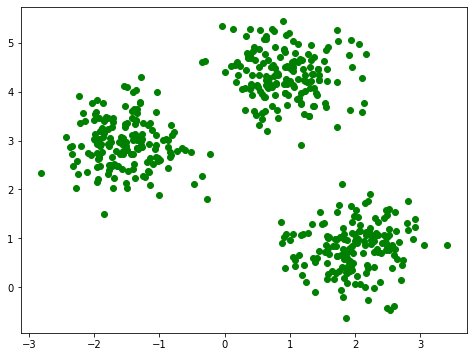

In [32]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=0.50, random_state=0)
fig, ax = plt.subplots(1, figsize=(8,6))
plt.scatter(X[:,0],X[:,1], c='green')
plt.show()

In [7]:
# initialize the model
model = Kmeans()

In [34]:
# run kmeans algorith by accessing the fit method 
centroids, labels = model.fit(X,3)

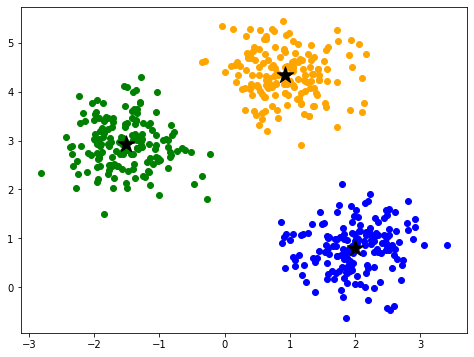

In [35]:
#plot clusters and centroid

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c='green', label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='blue', label='cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], c='orange', label='cluster 3')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black', label='centroid')
plt.show()

<div style=style="font-size: 18px">
    <p style="font-family:times new roman">
    The three different colors represent 3 clusters and 'star' represents the centroid of each cluster</p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
  1.4  Limitations
     </h1></div>
<br>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. In some cases, it can be difficult to choose the number of clusters if there is no prior knowledge about the data or domain. <br>
2. It is sensitive to the initialization of centroids. Different random initialization of centroids may lead to very different results and may not cluster the data points effectively. 
<p></div>

<div style=style="font-size: 20px">
<p style="font-family:times new roman">
    <b>1.5  Kmeans++</b> </p></div>
    
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
    To overcome the limitation of initialization of centroids, we can use a strategy that ensures a better initialization of centroids and improves the quality of our clustering. The algorithm is known as Kmeans++. Apart from the initialization, the rest of the algorithm is the same standard Kmeans algorithm. 
    </p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:t 20px"> 
    1.6  Algorithm for initialization of centroids </h1></div>
  
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
1. Select the first centroid out of the K centroids by shuffling the data and randomly selecting one data point from the dataset. <br>
2. To select the remaining centroids, compute the Euclidean distance between each data point and its nearest cluster.<br>
3. Find the data point that is at the maximum distance from its nearest cluster, this point is your next centroid.<br>
4. Repeat steps 2-3 until K centroids have been sampled from the data.
    </p></div>

<div style=style="font-size: 16px">
   <p style="font-family:times new roman"> <b>Let's run our implementation of Kmeans++ from scratch on sklearn's breast cancer dataset.</b>
           </p>
    </div>
       
<br>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">     
The dataset has input features and corresponding labels i.e Y==1  indicates benign case and Y==0 means no cancer.
After fitting the model using Kmeans++ algorithm, we aim to see how our model has classified cases of cancer vs benign.
           </p>
    </div>

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

X = cancer.data
Y = cancer.target


<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Since Kmeans/Kmeans++ employ distance-based measurement (euclidean distance) to identify similarities between data points, it is highly recommended to normalize the input features before fitting the model otherwise it may lead to undesirable results.</p></div>

In [58]:
sc = StandardScaler()
X = sc.fit_transform(X)



In [59]:
# initialize the model
model = Kmeans(variant='kmeans++', tolerance=0.01)

In [60]:
# run kmeans++
centroids, labels  = model.fit(X,2)

Running KMeans++


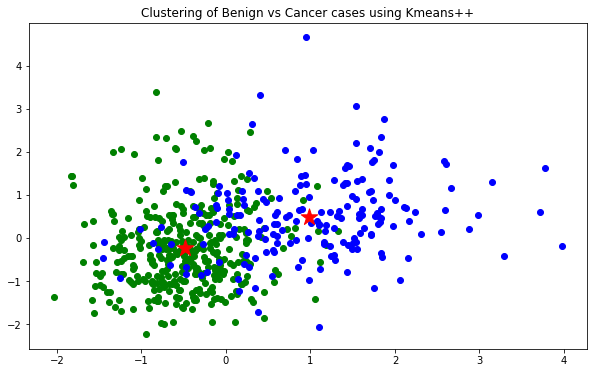

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], c='green', label='cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='red', label='centroid')
plt.title("Clustering of Benign vs Cancer cases using Kmeans++", fontdict={'fontsize':12})
plt.show()

<div style=style="font-size: 18px">
<p style="font-family:times new roman">  
Assign the most common prediction of the cluster as its prediction and then compute the confusion matrix using true Y labels. </p></div>

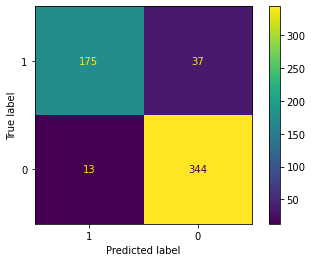

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predicted = np.array([0 if i == 1 else 1 for i in labels])

mat = confusion_matrix(Y, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=mat,display_labels=[1,0])
disp.plot()
plt.show()


<div style=style="font-size: 18px">
<p style="font-family:times new roman"> 
Calculate the accuracy of Kmeans++ based model. 
</p></div>

In [98]:
accuracy = ((mat[0,0]+mat[1,1])/np.sum(mat))*100
print("The accuracy of our model is {} %".format(np.round(accuracy, decimals=2)))

The accuracy of our model is 91.21 %


<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
2.0  Applications of Clustering
    </h1></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
2.1 Image Compression
    </h1></div>

<div style="font-family:times new roman"> 
 <p style="font-size:18px"> 
     <b>Google Photos</b> is a cloud-based photo sharing and storage application developed by Google. It offers up to 15 GB of free storage every to one of its users to store high-quality images. </p> </div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
But how is it able to store billions of images? <br>
    Google compresses images to save space. For e.g., If a photo is larger than 16 MP, it gets resized to 16 MP.
Videos higher than 1080p are resized to high-definition 1080p.

</p></div>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Let's see how we can use Kmeans++ to compress images.
</p></div>

In [92]:
from PIL import Image

In [93]:
img = Image.open('bird_2.jpg')
img_arr = np.asarray(img)
l, w, c = img_arr.shape
img_arr = np.asarray(img)

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Original Image </p></div>

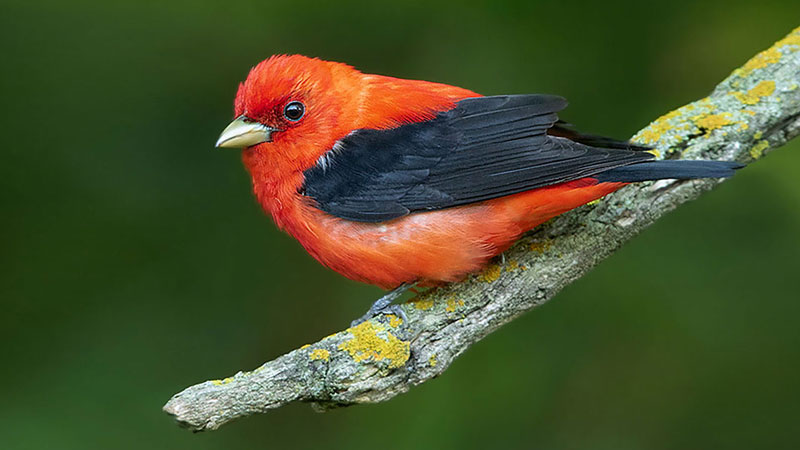

In [104]:
img

In [94]:
# faltten the image
X = img_arr.reshape(-1,1)

In [96]:
model = Kmeans(variant='kmeans++')

In [97]:
centroids, labels = model.fit(X,k=4)   #

Running KMeans++


In [99]:
labels = labels.astype('int')
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points



In [100]:
img_ = Image.fromarray(X.reshape((l,w,3)))
# img_.show()

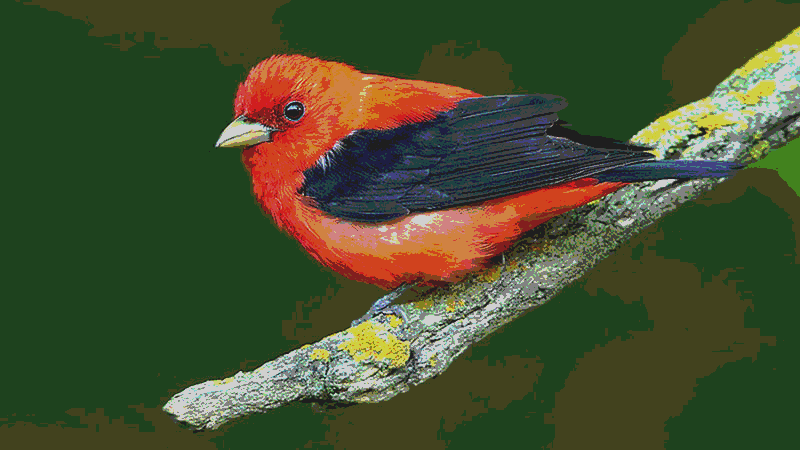

In [101]:
img_

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
We have successfully compressed the image by reducing the number of colors to only 4 colors. 
</p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
2.2 Customer Segmentation
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">
It is one of the most widely used applications of clustering. A supermarket retail chain has data on their customers which can include demographic, geographical, psychographics, and behavior information. Retailers can leverage this data by grouping their customers into subgroups that exhibit similar characteristics. Segmentation of customers can help retailers to better understand their customers by recommending them suitable offers, appropriate product pricing, customized marketing campaigns, and suitable products as per the customer profile.</p></div>

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
Let's use Kmeans++ to compress segment customers into different clusters.
    </p></div>

In [107]:
df = pd.read_csv('Mall_Customers.csv')

In [108]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [109]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [110]:
model_cust = Kmeans(variant='kmeans++', tolerance=1e-12)

In [111]:
X= np.array(df.iloc[:,1:])

In [112]:
centroids_, labels_ = model_cust.fit(X,k=5)

Running KMeans++


In [113]:
labels_ = labels_.astype('int')
df['label'] = labels_

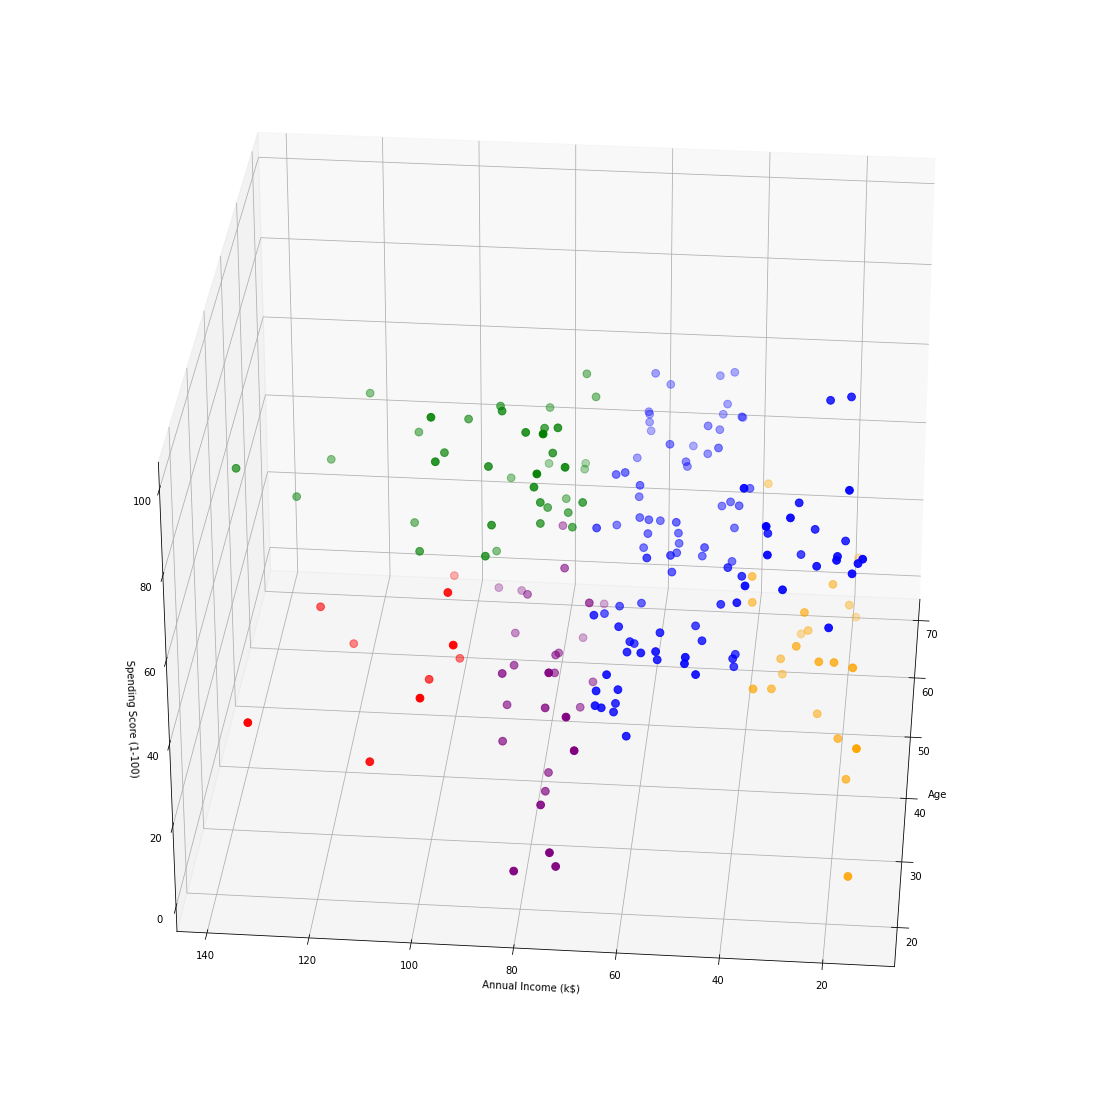

In [114]:
fig = plt.figure(figsize=(30,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

<div style=style="font-size: 18px">
<p style="font-family:times new roman">
The plot above can help us understand the profile of our customers. For e.g. we can infer people that belong to the red cluster have high annual income and high spending scores. Such insights can be generated which can help in curating marketing campaigns, recommending target offers, right pricing, etc.</p></div>

<div style="font-family:times new roman"> 
 <h1 style="font-size:20px"> 
Conclusion
    </h1></div>
<br>
<div style=style="font-size: 18px">
<p style="font-family:times new roman">  
In this report, we introduced the topic of clustering and discussed Kmeans/Kmeans++ algorithm in detail and its limitations.  It is usually one of the first preliminary steps that we apply when solving clustering tasks to get an idea of the structure of the dataset. We also went through their applications in image compression, classification, and customer segmentation. 
</p></div>